In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
from scipy.special import erf 
import math as mt

In [22]:
x,y,err = np.loadtxt('Example_chi2.txt', delimiter=';')

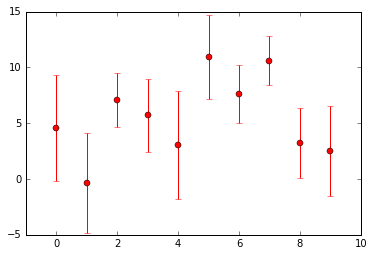

In [23]:
plt.errorbar(x,y,err,fmt='o',color='r')
plt.xlim(-1,10)
plt.show()

In [46]:
arr_a = np.linspace(-1,5,61)
arr_b = np.linspace(-1,5,61)
arr_c = np.linspace(-1,5,61)
arr3D = np.zeros((61,61,61))

for indexA in range(0,len(arr_a)):
    for indexB in range(0,len(arr_b)):
        for indexC in range(0,len(arr_c)):
            ymod = arr_a[indexA] * np.power(x,2) + arr_b[indexB] * x + arr_c[indexC]
            arr3D[indexA,indexB,indexC] = np.sum(np.power(ymod - y,2)/np.power(err,2))
            


In [51]:
arr3D

array([[[  2656.83508374,   2648.17740188,   2639.53948231, ...,
           2187.35658861,   2179.84511912,   2172.35341192],
        [  2600.25659286,   2591.69659087,   2583.15635115, ...,
           2136.44352957,   2129.02973994,   2121.6357126 ],
        [  2544.29528238,   2535.83296025,   2527.39040039, ...,
           2086.14765093,   2078.83154116,   2071.53519367],
        ..., 
        [   395.48180565,    392.48955563,    389.51706789, ...,
            254.59835705,    252.7523194 ,    250.92604403],
        [   374.69977767,    371.80520751,    368.93039963, ...,
            239.48176091,    237.73340312,    236.00480761],
        [   354.53493009,    351.73803979,    348.96091177, ...,
            224.98234517,    223.33166723,    221.70075158]],

       [[  2267.95632744,   2259.91582598,   2251.8950868 , ...,
           1834.27429521,   1827.38000612,   1820.50547931],
        [  2215.66554319,   2207.72272159,   2199.79966227, ...,
           1787.6489428 ,   1780.8523